# Combined Figure

The purpose of this document is to develop a combined figure ideated during the practice run of the PoGO presentation with Jonathan on 8/13/24. The figure will combine the line charts showing the number of contributions to Tethys Engineering and the line chart showing the number of active projects from Projects Database.

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'C:/Users/deca761/OneDrive - PNNL/Documents/Work Items/Ongoing/PRIMRE Research Questions/repo/notebooks/reports'

In [4]:
pjdb_df = pd.read_csv(f'{path}/pjdb_fig_data.csv')
pjdb_df.head(3)

,year,devices_started,devices_ended,active_devices
0,1999,1,0,1
1,2000,0,0,1
2,2001,2,0,3


In [5]:
t_te_df = pd.read_csv(f'{path}/t_te_fig_data.csv')
t_te_df.head(3)

,year,t_wave,t_tidal,t_other,te_wave,te_tidal,te_other
0,2009,12,12,55,33,31,1
1,2010,30,24,68,143,95,2
2,2011,24,43,91,66,79,4


### Dev

In [12]:
master_df = t_te_df.merge(pjdb_df, how='left', on='year')
master_df

,year,t_wave,t_tidal,t_other,te_wave,te_tidal,te_other,devices_started,devices_ended,active_devices
0,2009,12,12,55,33,31,1,3,1,13
1,2010,30,24,68,143,95,2,6,4,15
2,2011,24,43,91,66,79,4,5,3,17
3,2012,47,56,84,88,94,8,4,2,19
4,2013,54,67,131,113,98,6,7,5,21
5,2014,41,77,118,159,172,8,7,3,25
6,2015,48,100,195,191,162,8,11,3,33
7,2016,46,73,158,214,170,12,14,6,41
8,2017,42,66,161,265,199,13,5,7,39
9,2018,32,68,118,288,230,14,13,7,45


In [13]:
master_df['t_total'] = master_df['t_wave'] + master_df['t_tidal'] + master_df['t_other']
master_df['te_total'] = master_df['te_wave'] + master_df['te_tidal'] + master_df['te_other']

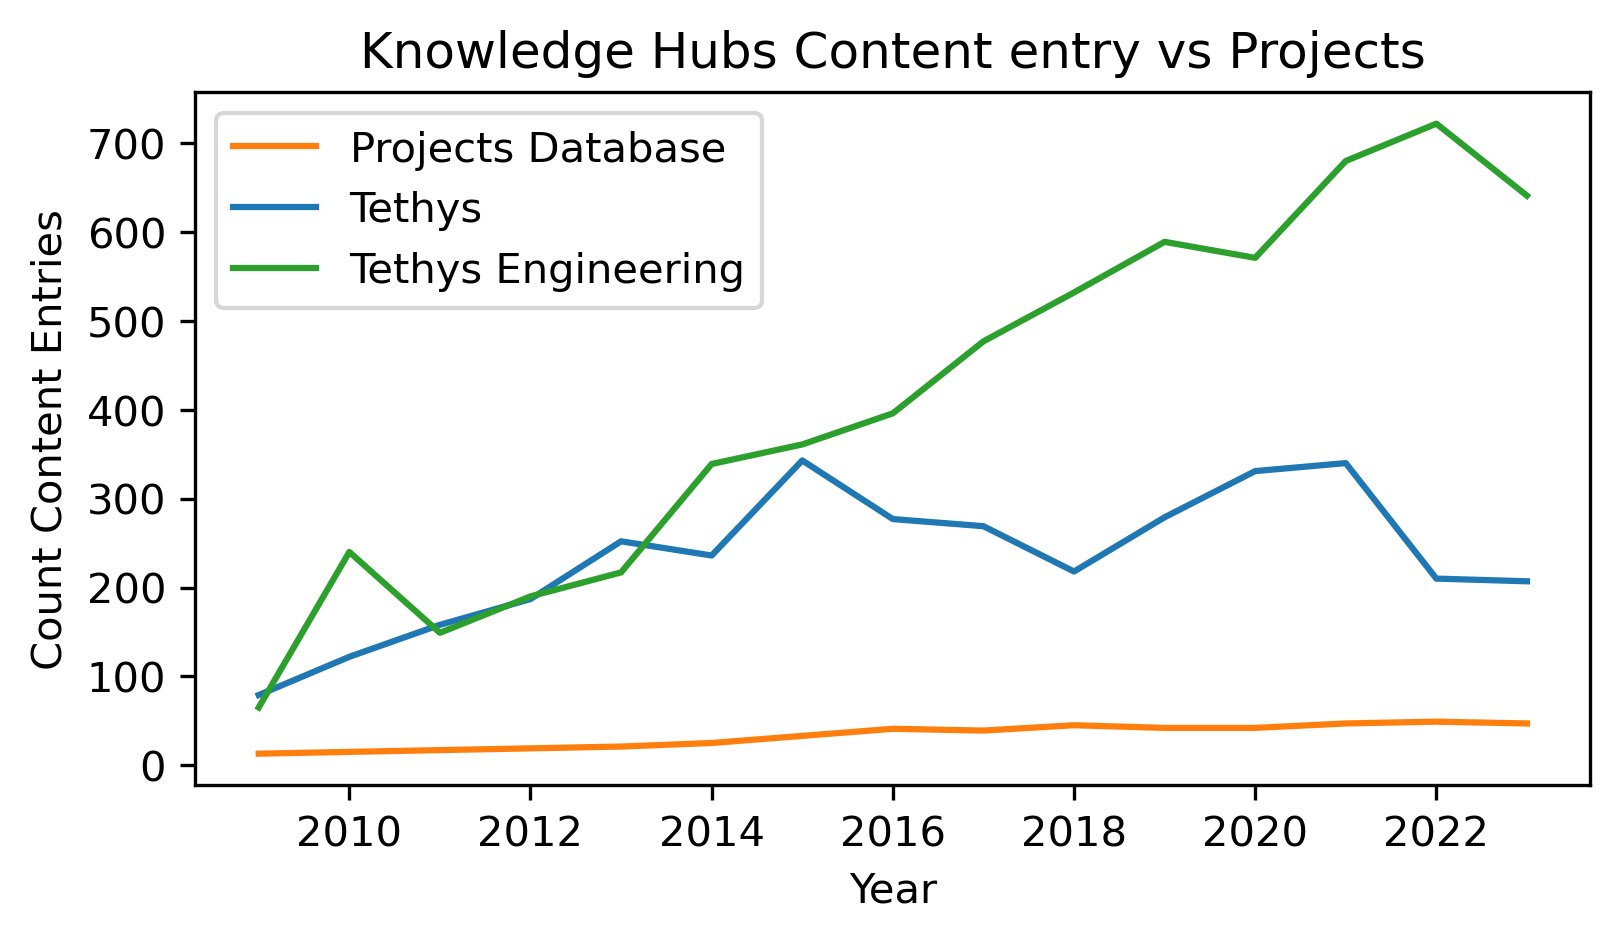

In [17]:
# First try
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots()
b, = ax.plot(master_df['year'], master_df['t_total'], label = 'Tethys', color='tab:blue')
c, = ax.plot(master_df['year'], master_df['te_total'], label = 'Tethys Engineering', color='tab:green')
a, = ax.plot(master_df['year'], master_df['active_devices'], label = 'Projects Database', color='tab:orange')

ax.set_title('Knowledge Hubs Content entry vs Projects')
ax.set_xlabel('Year')
ax.set_ylabel('Count Content Entries')
ax.legend(handles = [a, b, c])
fig.set_size_inches([6,3])

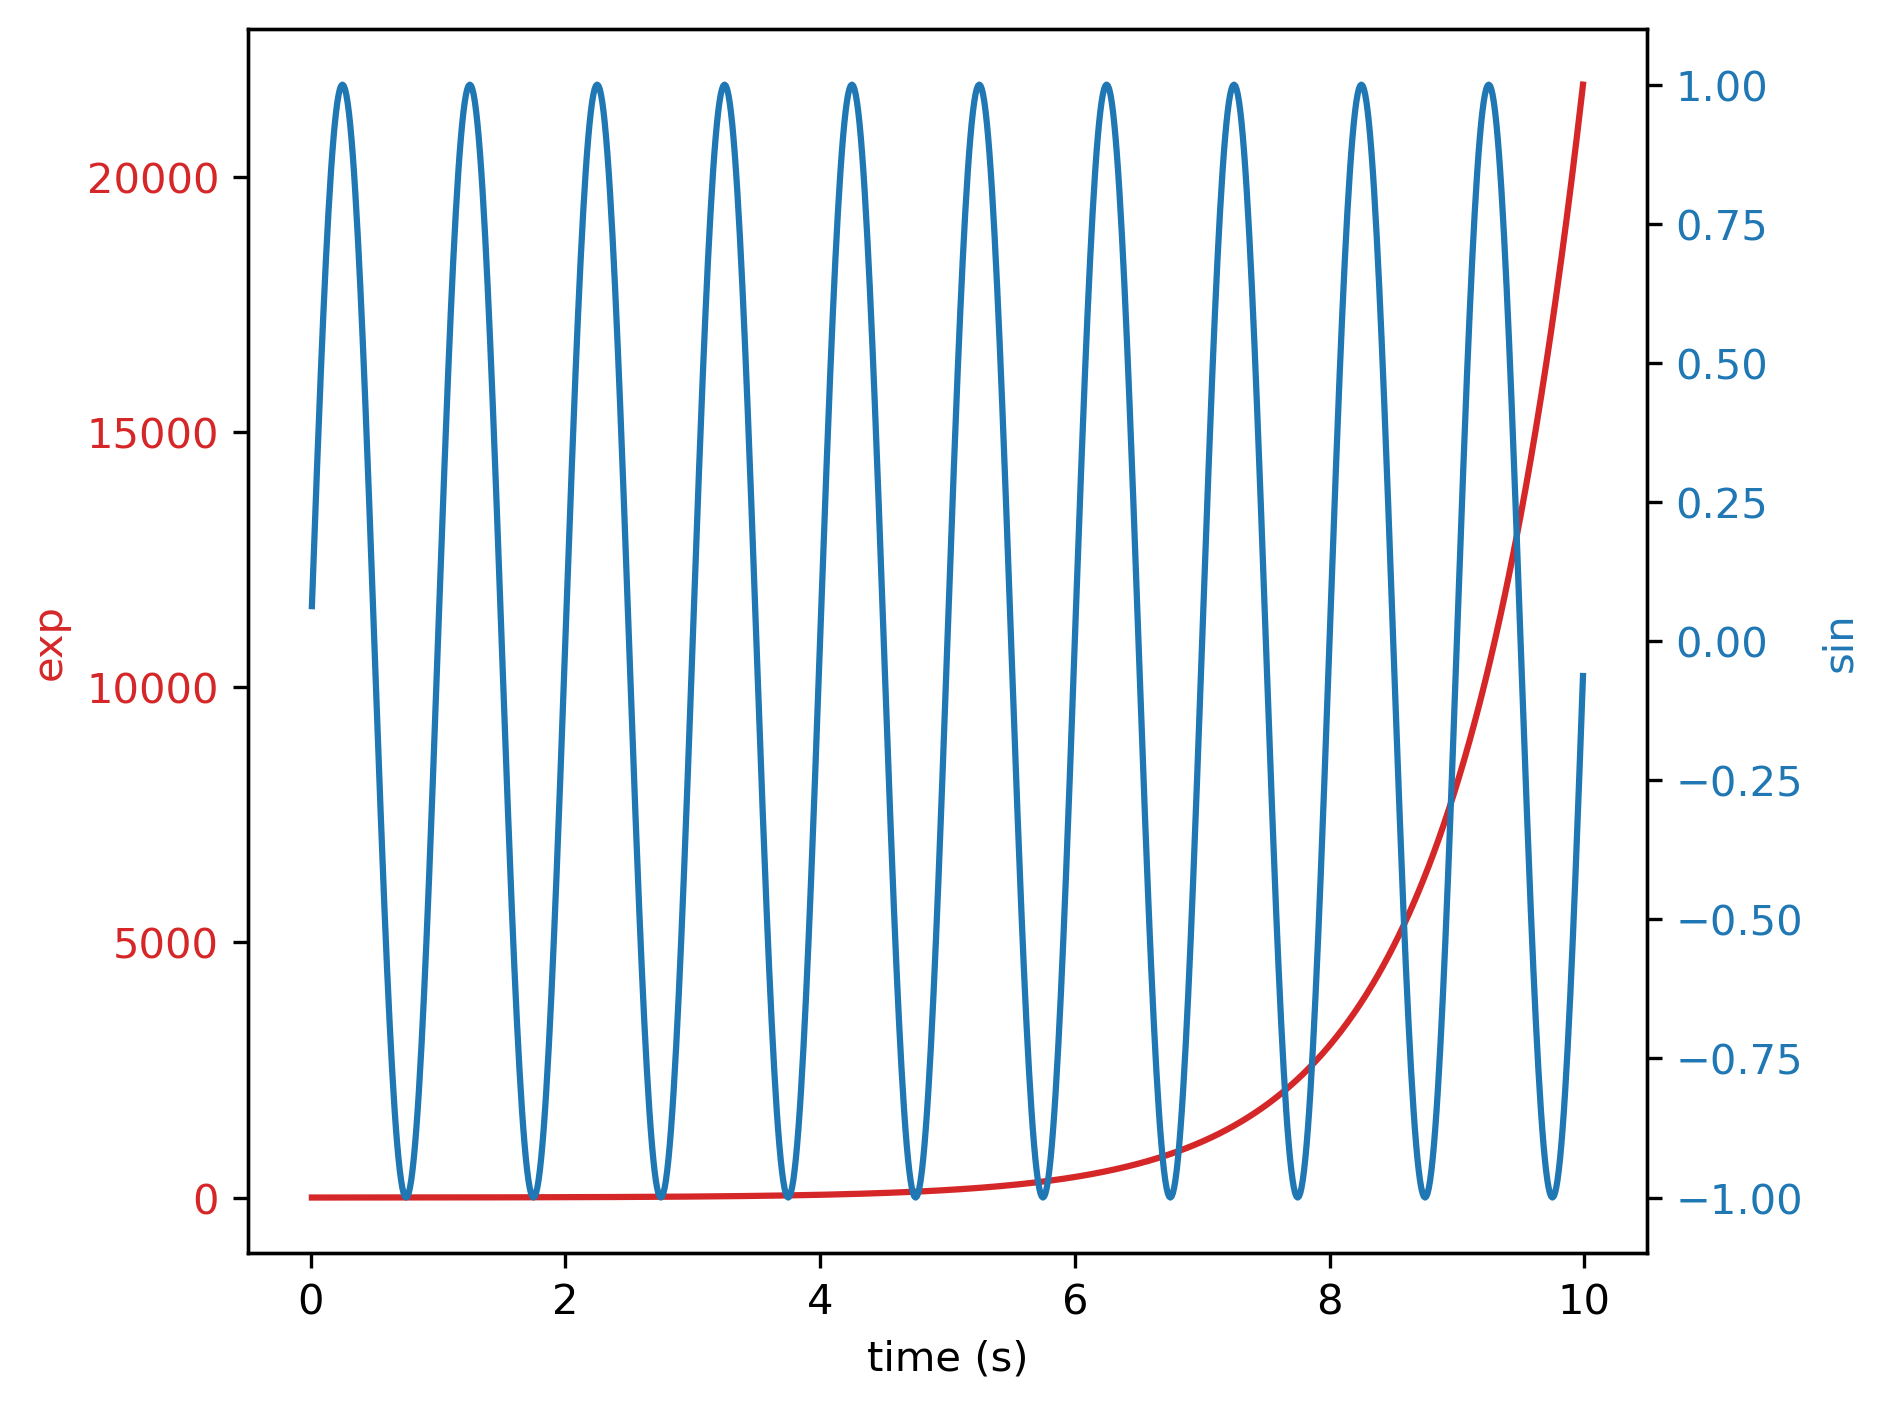

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [18]:
# Second Try

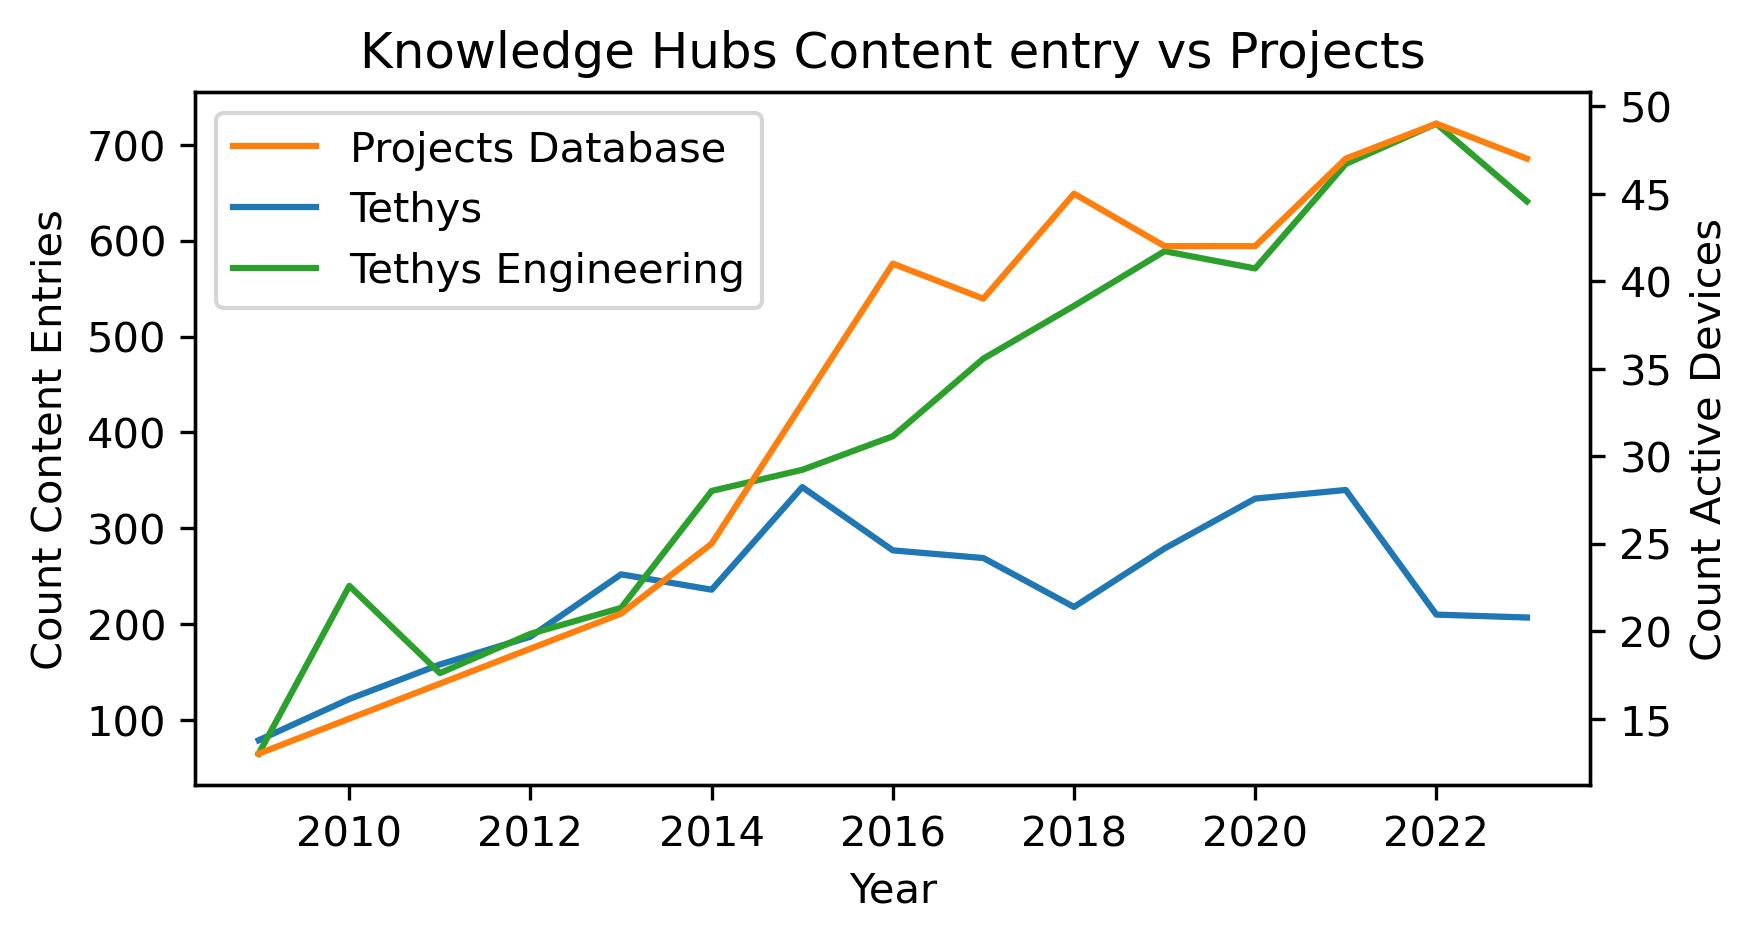

In [22]:
plt.rcParams['figure.dpi'] = 300
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Count Content Entries')
b, = ax1.plot(master_df['year'], master_df['t_total'], label = 'Tethys', color='tab:blue')
c, = ax1.plot(master_df['year'], master_df['te_total'], label = 'Tethys Engineering', color='tab:green')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('Count Active Devices')
a, = ax2.plot(master_df['year'], master_df['active_devices'], label = 'Projects Database', color='tab:orange')
ax2.set_title('Knowledge Hubs Content entry vs Projects')
ax2.legend(handles = [a, b, c])

fig.set_size_inches([6,3])
plt.savefig('combined_fig.png', bbox_inches='tight')